In [1]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import metrics
import seaborn as sns
import pandas as pd
import numpy as np
import os

In [2]:
data = pd.read_csv(os.getcwd() + '\data\merged_train.csv')

**Splitting data using the hold-out method**

In [3]:
# columns = np.array([i for i in range(4, 16)], dtype=np.intp) # All columns
columns = np.array([3, 4, 5, 7, 9, 10, 13, 14, 15], dtype=np.intp)
# columns = np.array([3, 4, 5, 7, 10, 14, 15], dtype=np.intp)
# columns = np.array([3, 4, 5, 6, 7, 11, 14, 15], dtype=np.intp)

# print('Columns being used for building the classifier: {}'.format( data.iloc[:, columns].columns ))

x_train, x_test, y_train, y_test = train_test_split(data.iloc[:, columns], data['Party'], train_size=0.75, random_state=0)

**Building a classifier**

In [4]:
def train_classifier(clf, x_train, y_train):
    classifier = Pipeline([('scalar', StandardScaler()),
        ('clf', clf)
    ])
    classifier.fit(x_train, y_train)
    return classifier

**Evaluate the performance of a classifier**

In [5]:
def holdout_score(y_test, y_pred):
    return_str = ''
    accuracy = metrics.accuracy_score(y_test, y_pred)
    return_str += 'Accuracy: {}'.format( accuracy ) + '\n'
    return_str += 'Error: {}'.format( 1 - accuracy ) + '\n'
    return_str += 'Precision: {}'.format( metrics.precision_score(y_test, y_pred, average = None) ) + '\n'
    return_str += 'Recall: {}'.format( metrics.recall_score(y_test, y_pred, average = None) ) + '\n'
    return_str += 'F1 Score: {}'.format( metrics.f1_score(y_test, y_pred, average = None) )
    return return_str

## Decision Tree Classifier

In [6]:
def decision_tree(x_train, y_train):
    classifier = train_classifier(DecisionTreeClassifier(criterion = "entropy", class_weight={1: 2}), x_train, y_train)
    y_pred = classifier.predict(x_test)
    conf_matrix = metrics.confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion matrix')
    plt.tight_layout()
    print(holdout_score(y_test, y_pred))

Accuracy: 0.7625418060200669
Error: 0.23745819397993306
Precision: [0.83259912 0.54166667]
Recall: [0.85135135 0.50649351]
F1 Score: [0.84187082 0.52348993]


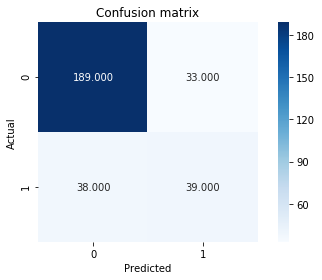

In [7]:
decision_tree(x_train, y_train)

## K-Nearest Neighbours Classifier

In [8]:
def k_nearest_neighbors(x_train, y_train):
    classifier = train_classifier(KNeighborsClassifier(n_neighbors = 3), x_train, y_train)
    y_pred = classifier.predict(x_test)
    conf_matrix = metrics.confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion matrix')
    plt.tight_layout()
    print(holdout_score(y_test, y_pred))

Accuracy: 0.8060200668896321
Error: 0.19397993311036787
Precision: [0.84166667 0.66101695]
Recall: [0.90990991 0.50649351]
F1 Score: [0.87445887 0.57352941]


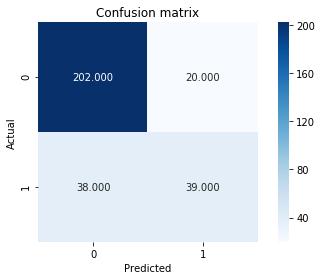

In [9]:
k_nearest_neighbors(x_train, y_train)

## Naive Bayes Classifier

In [10]:
def naive_bayes(x_train, y_train):
    classifier = train_classifier(GaussianNB(), x_train, y_train)
    y_pred = classifier.predict(x_test)
    conf_matrix = metrics.confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion matrix')
    plt.tight_layout()
    print(holdout_score(y_test, y_pred))

Accuracy: 0.8127090301003345
Error: 0.18729096989966554
Precision: [0.85470085 0.66153846]
Recall: [0.9009009  0.55844156]
F1 Score: [0.87719298 0.6056338 ]


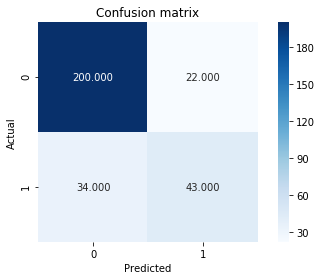

In [11]:
naive_bayes(x_train, y_train)

## SVM Classifier

In [12]:
def svm(x_train, y_train):
    classifier = train_classifier(SVC(kernel='rbf', class_weight={1: 2.16}), x_train, y_train)
    y_pred = classifier.predict(x_test)
    conf_matrix = metrics.confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion matrix')
    plt.tight_layout()
    print(holdout_score(y_test, y_pred))

Accuracy: 0.8127090301003345
Error: 0.18729096989966554
Precision: [0.89150943 0.62068966]
Recall: [0.85135135 0.7012987 ]
F1 Score: [0.87096774 0.65853659]


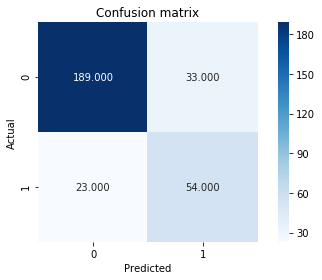

In [13]:
svm(x_train, y_train)